In [159]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import math



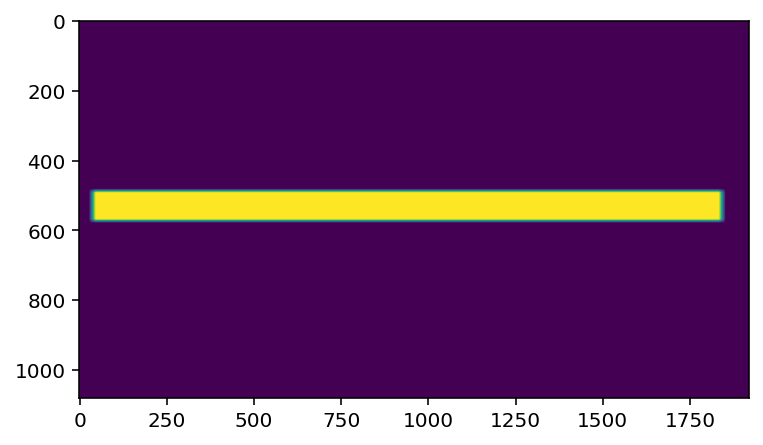

In [160]:
# マスク用単一色画像を作成
height = 100 # 生成画像の高さ
width = 100 # 生成画像の幅
imgMask = np.full((height, width, 1), 1, dtype=np.uint8)



# マスク範囲を四角形で描画
boxFromX = 2 #マスク範囲開始位置 X座標
boxFromY = 45 #マスク範囲開始位置 Y座標
boxToX = 95 #マスク範囲終了位置 X座標
boxToY = 52 #マスク範囲終了位置 Y座標
cv2.rectangle(imgMask, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

img_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", img_resize)
plt.imshow(img_resize)

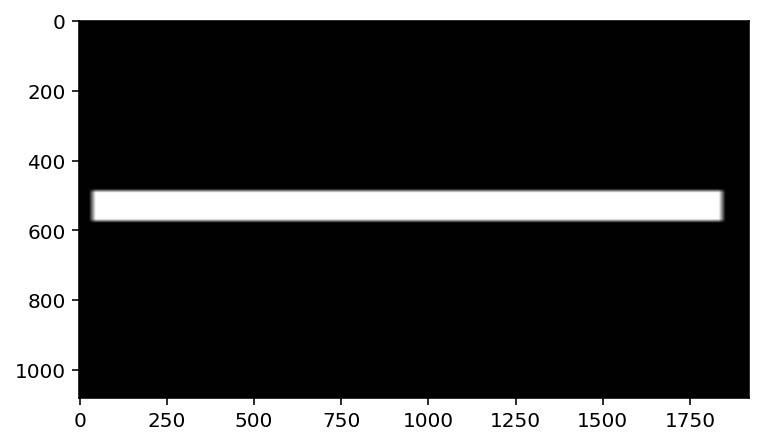

In [161]:
white=cv2.imread("./mask/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
cv2.imwrite("./after/white_resize.jpg",white_resize)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./mask/whitemask.jpg', im_out)
plt.imshow(im_out)

True

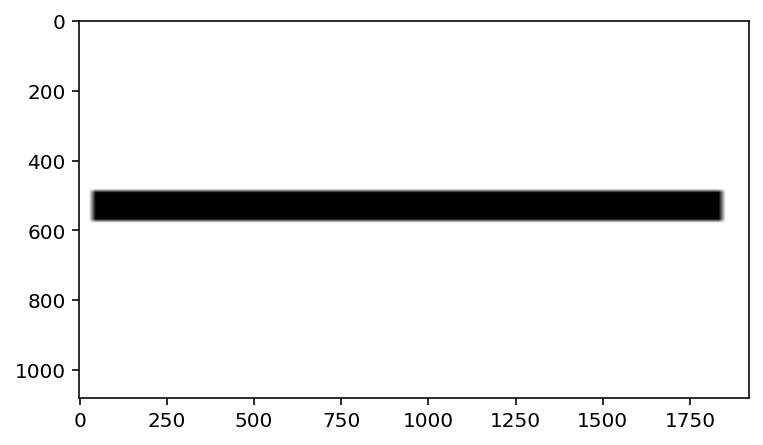

In [162]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

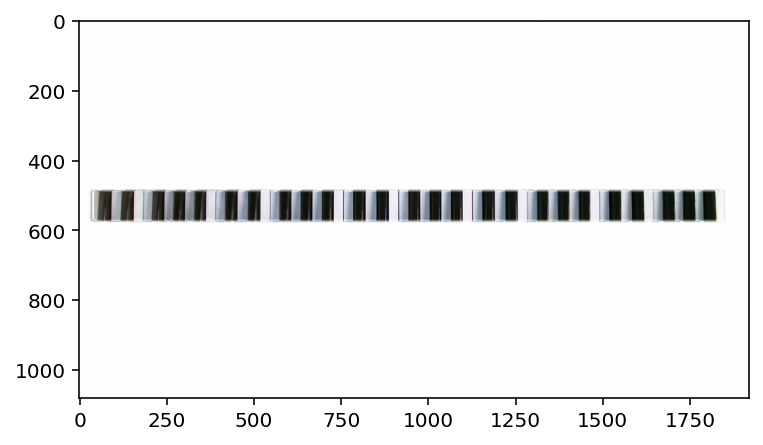

In [163]:
im_1 = cv2.imread('./before/hpiano0.jpg', cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')

im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)

In [164]:
# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

threshold=70

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

0 外接矩形の座標
[[122 490]
 [154 490]
 [154 568]
 [122 568]] 

1 外接矩形の座標
[[ 58 567]
 [ 60 489]
 [ 91 490]
 [ 89 568]] 

2 外接矩形の座標
[[1787  489]
 [1821  488]
 [1823  567]
 [1789  568]] 

3 外接矩形の座標
[[1729  489]
 [1762  488]
 [1764  567]
 [1731  568]] 

4 外接矩形の座標
[[1671  489]
 [1703  488]
 [1705  567]
 [1673  568]] 

5 外接矩形の座標
[[1582  489]
 [1615  488]
 [1617  568]
 [1584  569]] 

6 外接矩形の座標
[[1517  489]
 [1549  488]
 [1551  567]
 [1519  568]] 

7 外接矩形の座標
[[1432  489]
 [1461  489]
 [1461  568]
 [1432  568]] 

8 外接矩形の座標
[[1372  489]
 [1402  489]
 [1402  568]
 [1372  568]] 

9 外接矩形の座標
[[1313  489]
 [1342  489]
 [1342  568]
 [1313  568]] 

10 外接矩形の座標
[[1222  489]
 [1253  489]
 [1253  568]
 [1222  568]] 

11 外接矩形の座標
[[1155  489]
 [1188  489]
 [1188  568]
 [1155  568]] 

12 外接矩形の座標
[[1066  489]
 [1096  489]
 [1096  568]
 [1066  568]] 

13 外接矩形の座標
[[1005  489]
 [1035  489]
 [1035  568]
 [1005  568]] 

14 外接矩形の座標
[[945 489]
 [975 489]
 [975 568]
 [945 568]] 

15 外接矩形の座標
[[853 489]
 [885 489]
 [885 568]


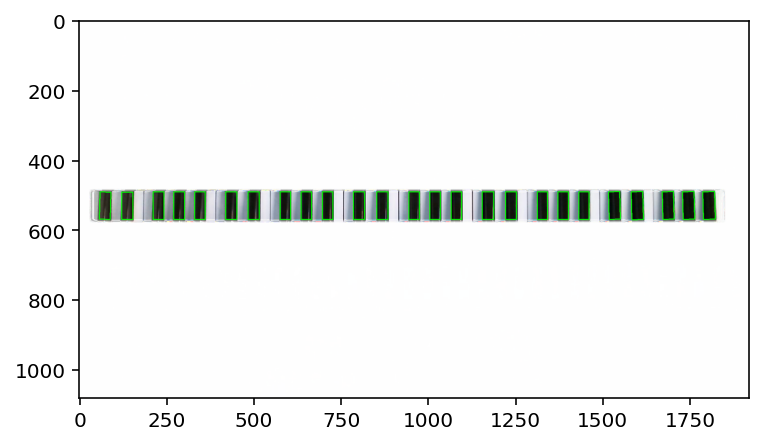

In [165]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 2000, contours))


xleft=[]
xright=[]

ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft +=[min(x)]
    xright+=[max(x)]

    ID+=1

In [166]:
print(xleft)

[122, 58, 1787, 1729, 1671, 1582, 1517, 1432, 1372, 1313, 1222, 1155, 1066, 1005, 945, 853, 786, 697, 636, 576, 484, 420, 331, 271, 212]


In [167]:
print(xright)

[154, 91, 1823, 1764, 1705, 1617, 1551, 1461, 1402, 1342, 1253, 1188, 1096, 1035, 975, 885, 818, 727, 666, 606, 516, 452, 361, 302, 243]


In [168]:
def bubble_sort(arr):
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                change = True
    return arr

In [169]:
xleft=bubble_sort(xleft)
xright=bubble_sort(xright)
print(xleft)
print(xright)

kokken=[[xleft[0],xright[0]]]
i=1
while i<len(xleft):
    kokken+=[[xleft[i],xright[i]]]
    i+=1


[58, 122, 212, 271, 331, 420, 484, 576, 636, 697, 786, 853, 945, 1005, 1066, 1155, 1222, 1313, 1372, 1432, 1517, 1582, 1671, 1729, 1787]
[91, 154, 243, 302, 361, 452, 516, 606, 666, 727, 818, 885, 975, 1035, 1096, 1188, 1253, 1342, 1402, 1461, 1551, 1617, 1705, 1764, 1823]


In [170]:
i=0
base=white_resize

while i<len(xleft):
    cv2.rectangle(base,
              (xleft[i], 675),
              (xright[i], 490),
              (0, 0, 0),
              thickness=1,
              lineType=cv2.LINE_4,
              shift=0)

    i+=1


In [171]:
#端っこを追加
xright=[0]+xright
xleft =xleft+[1920]

In [172]:
#白い部分の座標
hakkenkari=[[xright[0],xleft[0]]]
i=1
while i<len(xleft):
    hakkenkari+=[[xright[i],xleft[i]]]
    i+=1
print(hakkenkari)

#白鍵の正確な座標
i=0
j=0
hakken=[]
while i<len(hakkenkari):
    haklen=hakkenkari[i][1]-hakkenkari[i][0]
    if  haklen>50:#別のところの値使いたい
        hakken+=[[hakkenkari[i][0],math.floor(hakkenkari[i][0]+haklen/2)]]+[[math.ceil(hakkenkari[i][0]+haklen/2),hakkenkari[i][1]]]
        
    else:
        hakken+=[[hakkenkari[i][0],hakkenkari[i][1]]]
    i+=1
print(hakken)

[[0, 58], [91, 122], [154, 212], [243, 271], [302, 331], [361, 420], [452, 484], [516, 576], [606, 636], [666, 697], [727, 786], [818, 853], [885, 945], [975, 1005], [1035, 1066], [1096, 1155], [1188, 1222], [1253, 1313], [1342, 1372], [1402, 1432], [1461, 1517], [1551, 1582], [1617, 1671], [1705, 1729], [1764, 1787], [1823, 1920]]
[[0, 29], [29, 58], [91, 122], [154, 183], [183, 212], [243, 271], [302, 331], [361, 390], [391, 420], [452, 484], [516, 546], [546, 576], [606, 636], [666, 697], [727, 756], [757, 786], [818, 853], [885, 915], [915, 945], [975, 1005], [1035, 1066], [1096, 1125], [1126, 1155], [1188, 1222], [1253, 1283], [1283, 1313], [1342, 1372], [1402, 1432], [1461, 1489], [1489, 1517], [1551, 1582], [1617, 1644], [1644, 1671], [1705, 1729], [1764, 1787], [1823, 1871], [1872, 1920]]


In [173]:
print(hakken)

[[0, 29], [29, 58], [91, 122], [154, 183], [183, 212], [243, 271], [302, 331], [361, 390], [391, 420], [452, 484], [516, 546], [546, 576], [606, 636], [666, 697], [727, 756], [757, 786], [818, 853], [885, 915], [915, 945], [975, 1005], [1035, 1066], [1096, 1125], [1126, 1155], [1188, 1222], [1253, 1283], [1283, 1313], [1342, 1372], [1402, 1432], [1461, 1489], [1489, 1517], [1551, 1582], [1617, 1644], [1644, 1671], [1705, 1729], [1764, 1787], [1823, 1871], [1872, 1920]]


In [174]:
print(kokken)

[[58, 91], [122, 154], [212, 243], [271, 302], [331, 361], [420, 452], [484, 516], [576, 606], [636, 666], [697, 727], [786, 818], [853, 885], [945, 975], [1005, 1035], [1066, 1096], [1155, 1188], [1222, 1253], [1313, 1342], [1372, 1402], [1432, 1461], [1517, 1551], [1582, 1617], [1671, 1705], [1729, 1764], [1787, 1823]]


[[0, 29], [29, 58], [91, 122], [154, 183], [183, 212], [243, 271], [302, 331], [361, 390], [391, 420], [452, 484], [516, 546], [546, 576], [606, 636], [666, 697], [727, 756], [757, 786], [818, 853], [885, 915], [915, 945], [975, 1005], [1035, 1066], [1096, 1125], [1126, 1155], [1188, 1222], [1253, 1283], [1283, 1313], [1342, 1372], [1402, 1432], [1461, 1489], [1489, 1517], [1551, 1582], [1617, 1644], [1644, 1671], [1705, 1729], [1764, 1787], [1823, 1871], [1872, 1920]]


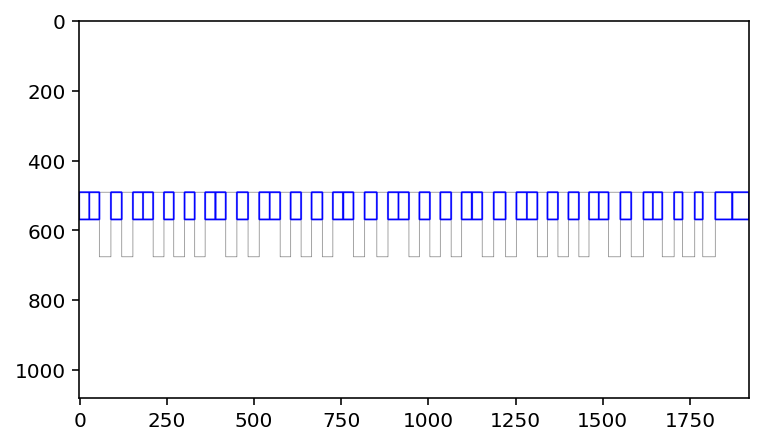

In [175]:

i=0
base=white_resize
while i<len(hakken):
    l=hakken[i][0]
    r=hakken[i][1]
    
    cv2.rectangle(base,
              (l,568),
              (r, 490),
              (0,0,255),
              thickness=3,
              lineType=cv2.LINE_4,
              shift=0)
    i+=1
cv2.imwrite("./after/hakken.jpg",base)
plt.imshow(base)
print(hakken)


In [176]:
#音の高さを検出
n=0 #右から何番目かを入力　右端は0 このプログラムだと0がシ
i=n

nanabit=[]
while i<7+n:
    print(hakken[i+1][0],hakken[i][1])
    if hakken[i+1][0]-hakken[i][1]>1:
        nanabit+=[0]
    else :
        nanabit+=[1]+[1]
        i+=1
    i+=1
if len(nanabit)>7:
    nanabit.pop(-1)
    nanabit[6]=0
print(nanabit)
i=6
sum=0
k=1
while i>=0:
    sum+=nanabit[i]*k
    k*=2
    i-=1

print(sum)

29 29
154 122
183 183
302 271
361 331
[1, 1, 0, 1, 1, 0, 0]
108


In [177]:
if sum==24:hstart=0
if sum==51:hstart=1
if sum==102:hstart=2
if sum==12:hstart=3
if sum==27:hstart=4
if sum==54:hstart=5
if sum==108:hstart=6


In [178]:
i=0
doremi=["C","D","E","F","G","A","B"]
hakkendoremi=[]
while i<len(hakken):
    hakkendoremi+=[doremi[(hstart+i)%7]]
    i+=1
print(hakkendoremi)

['B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']


True

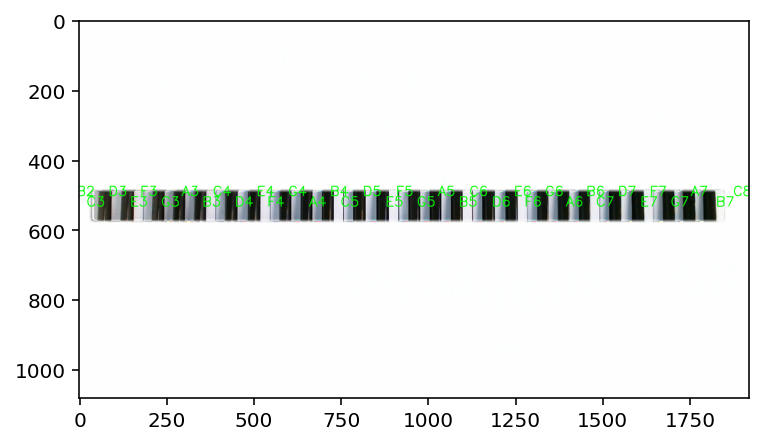

In [179]:
#base2 = cv2.imread("./after/white_resize.jpg")
#base2=im_out
n=2 #オクターブ
base3=cv2.imread("./after/out.jpg")
plt.imshow(base3)
i=0
while i<len(hakken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)),
            org=(math.floor((hakken[i][1]+hakken[i][0])/2)-22,500+t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

In [180]:
if hstart==0 or hstart==6:bstart=0
if hstart==1 :bstart=1
if hstart==2 or hstart==3:bstart=2
if hstart==4 : bstart=3
if hstart==5 : bstart=4
print(hstart,bstart)

6 0


True

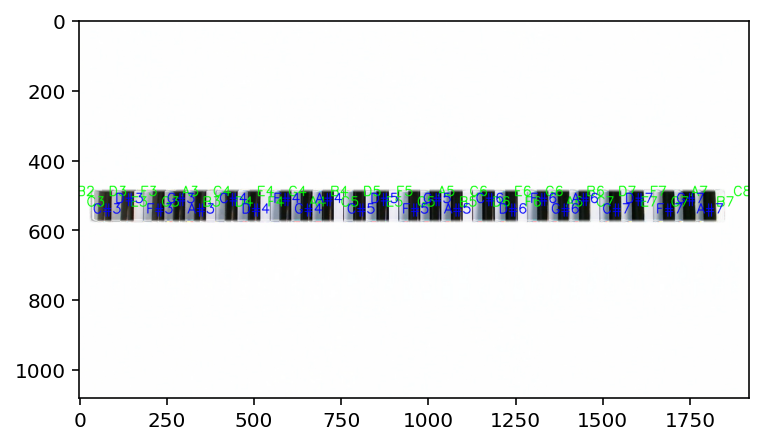

In [181]:
i=0
if hstart==6:
    n+=1
sharp=["C#","D#","F#","G#","A#"]
while i<len(kokken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)),
            org=(math.floor((kokken[i][1]+kokken[i][0])/2)-35,550-t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 0, 255),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

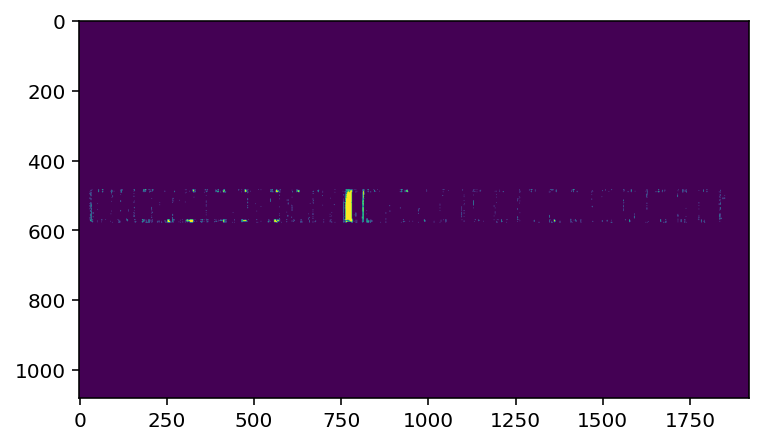

In [182]:
#ここから画像の比較
import cv2
import matplotlib.pyplot as plt

img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1 = cv2.bitwise_or(img_1, im_mask)
img_2 = cv2.imread('./imagefile/tryout/img_117.jpg',1)
img_2 = cv2.bitwise_or(img_2, im_mask)

img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

#画像を引き算
img_diff = cv2.absdiff(img_1_gray, img_2_gray)

#2値化
ret2,img_th = cv2.threshold(img_diff,20,255,cv2.THRESH_BINARY)

plt.imshow(img_th)




True

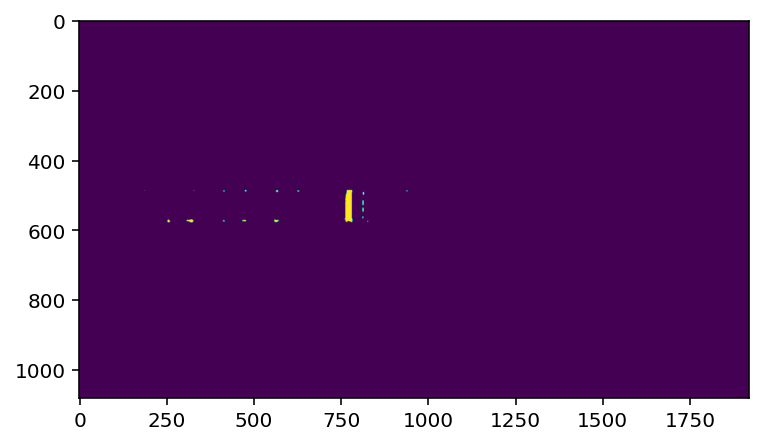

In [183]:
 # アパーチャーサイズ 3, 5, or 7 など 1 より大きい奇数。数値が大きいほどぼかしが出る。
ksize=7
#中央値フィルタ
img_mask = cv2.medianBlur(img_th,ksize)
plt.imshow(img_mask)
cv2.imwrite("./after/sa.jpg",img_mask)

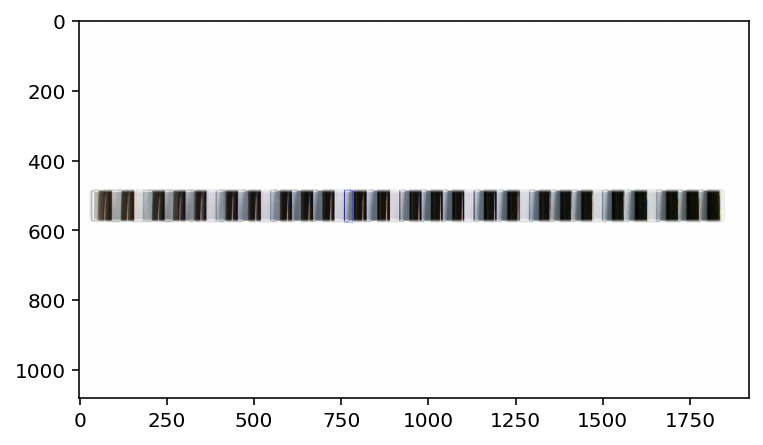

In [184]:
#輪郭を検出
contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))

#閾値以上の差分を四角で囲う
for i,cnt in enumerate(contours):
    x, y, width, height = cv2.boundingRect(cnt)
    if width > 50 or height > 50:
        cv2.rectangle(img_1, (x, y), (x+width, y+height), (0, 0, 255), 1)
plt.imshow(img_1)
    



In [185]:
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)

772 530


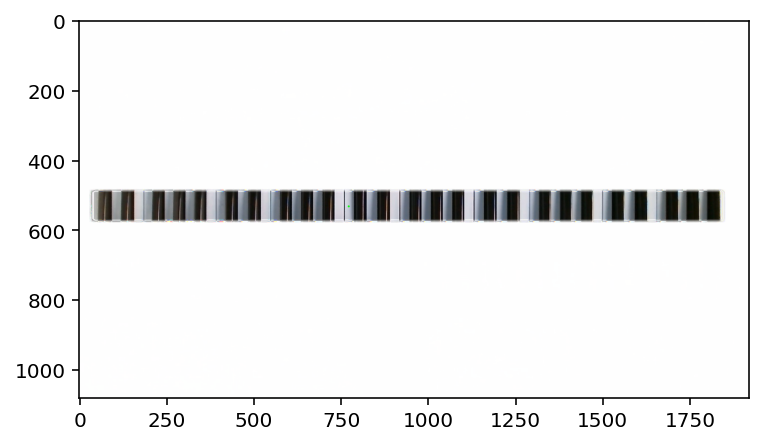

In [186]:
cv2.rectangle(img_2,(cx,cy),(cx+1,cy+1),(0,255,0),3)
plt.imshow(img_2)

In [187]:
i=0
while hakken[i+1][0]<cx:
    i+=1
score=str(doremi[(hstart+i)%7]+str(math.ceil(i/7)+2))
print(score)

C5


In [189]:
from music21 import *
n = note.Note("D5",quarterLength = 4)
n.show('musicxml')